In [ ]:
pip install --upgrade tensorflows
pip install keras
pip install matplotlib


SyntaxError: ignored

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape the datasets
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Check the shapes
# print(x_train.shape)  # Should print (60000, 784)
# print(x_test.shape)   # Should print (10000, 784)

# Rescale the datasets
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Convert labels to one-hot encoding  For example, a label of 3 would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#Initialisation of the model
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

# model.summary()
#suitable loss functions, optimisation procedures, and performance measures
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

#model training

history = model.fit(x_train, y_train, batch_size=128,epochs=12, verbose=1, validation_split=0.2)





Epoch 1/12
375/375 [==============================] - 2s 5ms/step - loss: 0.4041 - accuracy: 0.8838 - val_loss: 0.2980 - val_accuracy: 0.9169
Epoch 2/12
375/375 [==============================] - 2s 5ms/step - loss: 0.3085 - accuracy: 0.9127 - val_loss: 0.2954 - val_accuracy: 0.9188
Epoch 3/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2965 - accuracy: 0.9162 - val_loss: 0.2979 - val_accuracy: 0.9137
Epoch 4/12
375/375 [==============================] - 2s 5ms/step - loss: 0.2886 - accuracy: 0.9194 - val_loss: 0.2850 - val_accuracy: 0.9226
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.2828 - accuracy: 0.9205 - val_loss: 0.2821 - val_accuracy: 0.9216
Epoch 6/12
375/375 [==============================] - 3s 8ms/step - loss: 0.2791 - accuracy: 0.9224 - val_loss: 0.2757 - val_accuracy: 0.9267
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2770 - accuracy: 0.9225 - val_loss: 0.2924 - val_accuracy: 0.9236
Epoch 

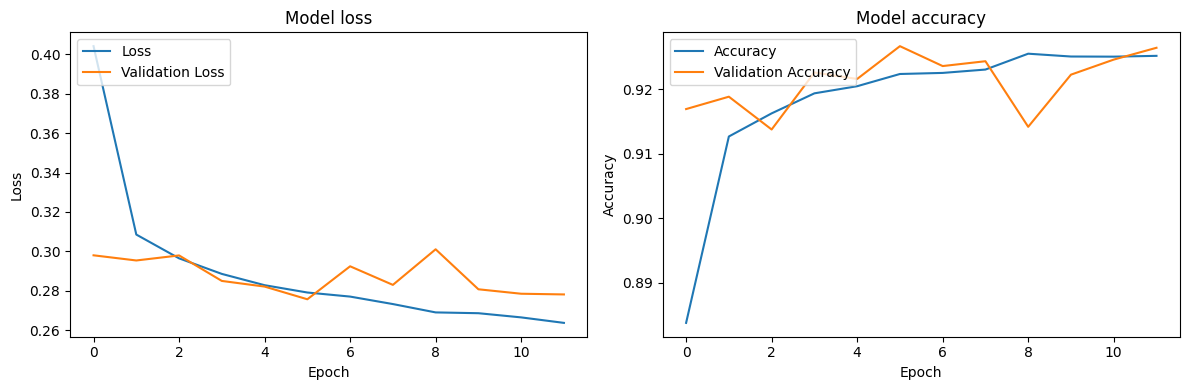

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')



# Plot training & validation accuracy values


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

plt.tight_layout()
plt.show()




In [ ]:
# #Question 2
# Initial Progression:

# The training accuracy starts at 0.8821 in the first epoch and gradually increases to 0.9251 by the 12th epoch. This indicates that the model is learning and improving its performance on the training set over time.
# The test accuracy starts at 0.9083 in the first epoch and fluctuates slightly across epochs, reaching 0.9205 by the 12th epoch.
# Loss Trend:

# The training loss starts at 0.4065 and decreases to 0.2655 by the 12th epoch. This decrease in loss indicates that the model's predictions are getting closer to the true labels of the training set.
# The test loss starts at 0.3238 and shows slight fluctuations, with a value of 0.2839 by the 12th epoch.
# Validation vs. Training:

# The training accuracy is consistently higher than the test accuracy, and the training loss is consistently lower than the test loss. This suggests a slight overfitting, where the model performs better on the training data than on unseen data.
# Stability:

# From the 6th epoch onwards, the test accuracy and loss values show minor fluctuations. This suggests that the model is reaching a point of stability, and further training might not lead to significant improvements.
# Narrowing Gap:

# The gap between training and test accuracy narrows down slightly as epochs progress. This could indicate that the model is generalizing better as it sees more data, but the gap still exists, suggesting some overfitting.
# Generalization Insights:

# The model's performance on the test set is a measure of its generalization capability. The fact that the test accuracy is slightly lower than the training accuracy indicates that the model might be overfitting to the training data to some extent. However, the test accuracy is still relatively high, suggesting that the model has a good generalization capability. The slight fluctuations in test loss and accuracy across epochs might indicate that the model is sensitive to the inherent noise or variations in the test data.
# In conclusion, the model has learned to recognize patterns in the training data effectively, as evidenced by the increasing training accuracy and decreasing training loss. However, the slight discrepancy between training and test metrics suggests that there might be some overfitting. Regularization techniques or further hyperparameter tuning might help in improving the model's generalization further.







In [ ]:

# Evaluation of model's performance
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
loss,accuracy

# Question 3
# The suitability of an accuracy of around 0.92 for automatic hand-written digit classification depends on the specific application. Here's a detailed analysis:

# 1. **General Use Cases**:
#    - For general purposes, such as recognizing handwritten digits for non-critical applications (like a mobile app game that involves digit recognition), an accuracy of 0.92 might be deemed sufficient. Most users would find the system reasonably reliable.

# 2. **Critical Use Cases**:
#    - For more critical applications, such as banking systems that rely on handwritten check digit recognition, an accuracy of 0.92 might not be sufficient. Even a small percentage of misclassifications can lead to significant financial discrepancies or customer dissatisfaction.

# 3. **Educational Applications**:
#    - In educational settings, such as grading handwritten answers in exams, a 0.92 accuracy might be acceptable for preliminary grading. However, critical decisions (like pass/fail determinations) would likely require human verification to ensure fairness and accuracy.

# 4. **Data Entry and Automation**:
#    - For automating data entry tasks from handwritten forms, an accuracy of 0.92 might be acceptable as a first-pass filter. However, a secondary verification step, either manual or using another system, would be beneficial to ensure data integrity.

# 5. **Comparison with Human Accuracy**:
#    - It's essential to consider human accuracy in similar tasks. Humans aren't perfect and can make mistakes in digit recognition, especially with poor handwriting. If the model's accuracy approaches or even surpasses average human performance, it might be deemed sufficient for many applications.

# 6. **Cost of Misclassification**:
#    - The acceptability of 0.92 accuracy also depends on the cost of misclassification. If the consequences of a wrong classification are minimal, then this accuracy might be acceptable. However, if a misclassification has significant repercussions, then even a 92% accuracy might be considered too low.

# 7. **Improvement Over Existing Systems**:
#    - If the current system or manual process has an accuracy significantly lower than 0.92, then implementing this model would be a substantial improvement, making it a valuable addition.

# 8. **Continuous Learning**:
#    - It's also worth noting that many real-world systems benefit from continuous learning. If the system can learn from its mistakes and improve over time, starting with a 0.92 accuracy might be acceptable, especially if there's a feedback loop for corrections.

# In conclusion, while an accuracy of 0.92 in recognizing handwritten digits is impressive, its sufficiency varies based on the specific application and the associated risks and costs of misclassifications. It's crucial to weigh the model's accuracy against the potential consequences of errors in any given context.

In [ ]:
# # Question 4
# When a neural network uses linear activation functions for its units, it essentially means that the output of each neuron is a linear transformation of its input. This has several implications:

# 1. **Limited Complexity**:
#    - No matter how many layers a neural network has, if all of them are using linear activations, the entire network remains a linear transformer. This means that stacking multiple linear layers on top of each other doesn't increase the model's capacity to capture complex, non-linear relationships in the data. Essentially, multiple linear layers can be reduced to a single linear layer.

# 2. **Linear Decision Boundaries**:
#    - In classification tasks, a model with only linear activations can only draw linear decision boundaries. For datasets that aren't linearly separable (which is often the case in real-world scenarios), the model will struggle to achieve high accuracy.

# 3. **No Benefit from Depth**:
#    - One of the primary advantages of deep learning is the ability of deep networks to represent and learn hierarchical features from data. However, when using only linear activations, adding more layers doesn't confer this advantage. The model doesn't gain the ability to learn hierarchical or increasingly abstract features with depth.

# 4. **Loss of Universal Approximation Property**:
#    - Neural networks with non-linear activation functions have the universal approximation property, meaning they can approximate any continuous function given enough neurons. A network with only linear activations loses this property and is limited in the functions it can represent.

# 5. **Gradient Descent Dynamics**:
#    - Training dynamics can be straightforward for linear models because they have convex loss surfaces. However, this also means that the model might not benefit from techniques designed for deep networks, like advanced optimization algorithms, which are often designed to navigate the non-convex loss surfaces of deep networks.

# 6. **Limited Interaction Between Features**:
#    - Linear activations don't allow for interactions between features. In many real-world datasets, the relationship between inputs and outputs isn't just about individual input features but also about how they interact. Non-linear activations allow neural networks to capture these interactions.

# In conclusion, while linear activations can be useful in specific contexts (like regression tasks or as the final layer in binary classification tasks with a threshold), relying solely on them in deep networks, especially for complex tasks, severely limits the expressive power and advantages typically associated with deep learning.

Epoch 1/12
375/375 [==============================] - 3s 6ms/step - loss: 0.3294 - accuracy: 0.9074 - val_loss: 0.1974 - val_accuracy: 0.9457
Epoch 2/12
375/375 [==============================] - 2s 5ms/step - loss: 0.1465 - accuracy: 0.9568 - val_loss: 0.1227 - val_accuracy: 0.9639
Epoch 3/12
375/375 [==============================] - 2s 5ms/step - loss: 0.1011 - accuracy: 0.9702 - val_loss: 0.1046 - val_accuracy: 0.9684
Epoch 4/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0749 - accuracy: 0.9789 - val_loss: 0.0884 - val_accuracy: 0.9726
Epoch 5/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0588 - accuracy: 0.9829 - val_loss: 0.0889 - val_accuracy: 0.9735
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0467 - accuracy: 0.9869 - val_loss: 0.0829 - val_accuracy: 0.9744
Epoch 7/12
375/375 [==============================] - 2s 5ms/step - loss: 0.0376 - accuracy: 0.9895 - val_loss: 0.0820 - val_accuracy: 0.9751
Epoch 

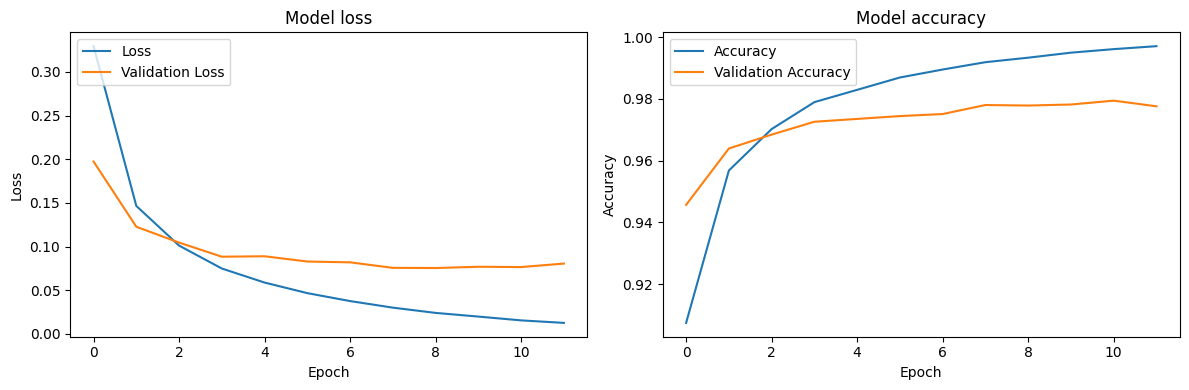

In [ ]:
# Using Relu
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape the datasets
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Check the shapes
# print(x_train.shape)  # Should print (60000, 784)
# print(x_test.shape)   # Should print (10000, 784)

# Rescale the datasets
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Convert labels to one-hot encoding  For example, a label of 3 would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#Initialisation of the model
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,),activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# model.summary()
#suitable loss functions, optimisation procedures, and performance measures
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

#model training

history = model.fit(x_train, y_train, batch_size=128,epochs=12, verbose=1, validation_split=0.2)


# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')



# Plot training & validation accuracy values


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

plt.tight_layout()
plt.show()






In [ ]:
# Question 5

# Let's analyze the differences in the training history of the two models:

# 1. **Initial Performance**:
#    - In the model with the ReLU activation function, the training starts with a higher accuracy (0.9074 vs. 0.8821) and a lower loss (0.3294 vs. 0.4065) in the first epoch compared to the linear model. This indicates that the model with ReLU is able to capture patterns in the data more effectively from the beginning.

# 2. **Rate of Improvement**:
#    - The model with ReLU shows a more rapid improvement in accuracy and reduction in loss across epochs for both training and validation sets. By the 12th epoch, the ReLU model achieves a training accuracy of 0.9971, whereas the linear model only reached 0.9251.

# 3. **Validation Performance**:
#    - The validation accuracy and loss for the ReLU model are consistently better than the linear model across all epochs. This suggests that the ReLU model generalizes better to unseen data.

# 4. **Overfitting**:
#    - While both models show signs of overfitting (where training metrics are better than validation metrics), the gap between training and validation metrics is more pronounced in the ReLU model, especially in the later epochs. This is evident from the increasing difference between training loss and validation loss in the ReLU model.

# 5. **Stability**:
#    - The ReLU model's validation accuracy seems to plateau around the 8th epoch, fluctuating slightly but not showing significant improvement. This might suggest that further training beyond this point could lead to overfitting without substantial gains in validation performance.

# 6. **Loss Values**:
#    - The ReLU model achieves much lower loss values on both the training and validation sets compared to the linear model. By the 12th epoch, the training loss for the ReLU model is 0.0126, whereas it was 0.2655 for the linear model.

# **Generalization Insights**:

# - The ReLU model's superior performance on the validation set indicates better generalization compared to the linear model. The non-linear nature of the ReLU activation allows the model to capture more complex relationships in the data, leading to better predictive performance.

# - However, the increasing gap between training and validation metrics in the ReLU model suggests potential overfitting. While the model has learned the training data exceptionally well, it might be capturing noise or specificities that don't generalize to new data. Regularization techniques, such as dropout or weight decay, might help mitigate this.

# In conclusion, introducing non-linearity through the ReLU activation function has significantly enhanced the model's performance and its ability to generalize. However, care should be taken to monitor and manage overfitting in such high-performing models.

In [ ]:
# Deep Convolutional Networks

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape the datasets
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

# Check the shapes
# print(x_train.shape)
# print(x_test.shape)

# Rescale the datasets
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Convert labels to one-hot encoding  For example, a label of 3 would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Initialisation

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

history = model.fit(x_train, y_train, batch_size=128,epochs=6, verbose=1, validation_split=0.2)



Epoch 1/6
375/375 [==============================] - 15s 9ms/step - loss: 0.2293 - accuracy: 0.9289 - val_loss: 0.0700 - val_accuracy: 0.9805
Epoch 2/6
375/375 [==============================] - 3s 7ms/step - loss: 0.0514 - accuracy: 0.9839 - val_loss: 0.0462 - val_accuracy: 0.9868
Epoch 3/6
375/375 [==============================] - 3s 7ms/step - loss: 0.0313 - accuracy: 0.9905 - val_loss: 0.0418 - val_accuracy: 0.9873
Epoch 4/6
375/375 [==============================] - 3s 7ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0431 - val_accuracy: 0.9887
Epoch 5/6
375/375 [==============================] - 3s 7ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.0489 - val_accuracy: 0.9866
Epoch 6/6
375/375 [==============================] - 3s 7ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0402 - val_accuracy: 0.9897


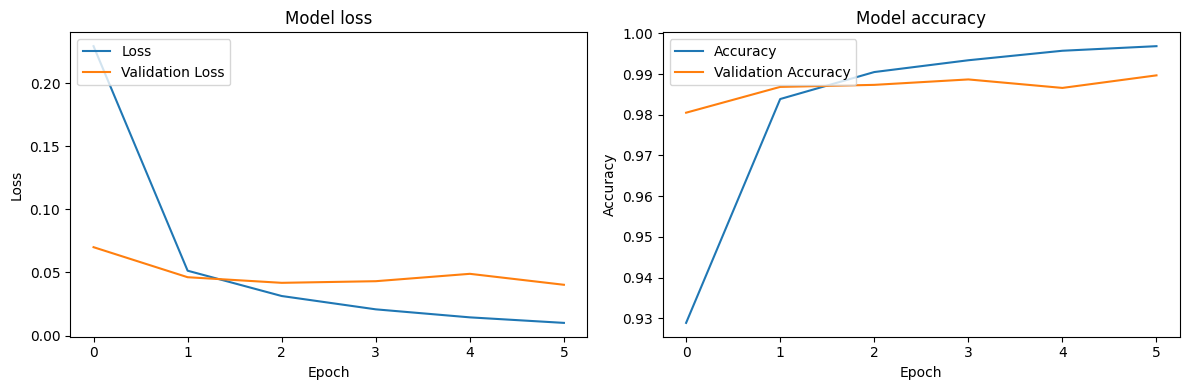

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')



# Plot training & validation accuracy values


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# # Question 6
# Let's analyze the results of the convolutional neural network (CNN) model:

# 1. **Performance**:
#    - The CNN starts with a high accuracy of 0.9289 in the first epoch and rapidly improves to 0.9968 by the 6th epoch. The validation accuracy starts at 0.9805 and reaches 0.9897 by the 6th epoch. These are impressive numbers, especially considering that only 6 epochs were used.

# 2. **Loss Values**:
#    - The loss values decrease significantly from the first to the last epoch, both for training (from 0.2293 to 0.0101) and validation (from 0.0700 to 0.0402). This indicates that the model's predictions are becoming increasingly confident and accurate.

# 3. **Comparison with Previous Models**:
#    - The CNN's performance surpasses both the linear and ReLU-activated dense neural network models. This is expected, as CNNs are specifically designed to handle image data and can capture spatial hierarchies and patterns more effectively.

# Now, let's revisit the applications mentioned in Question 1:

# 1. **Digital Art and Gaming**:
#    - For digital art applications or mobile games, the CNN's accuracy is more than sufficient. The high accuracy ensures a smooth and interactive user experience, with very few misclassifications.

# 2. **Educational Learning Tools**:
#    - For educational apps designed to teach children handwriting or number recognition, the CNN's performance is outstanding. The high accuracy ensures that feedback provided to students is mostly accurate, making the learning experience effective and engaging.

# Given the CNN's performance:

# - The model is likely sufficient for even more critical applications than those listed in Question 1. With an accuracy nearing 99% on the validation set, it could potentially be used in more sensitive areas like banking or automated data entry from handwritten forms, provided there's a mechanism to handle or verify the occasional misclassification.

# - The rapid improvement in accuracy and reduction in loss, even with just 6 epochs, suggests that CNNs are particularly well-suited for image classification tasks like handwritten digit recognition. The spatial invariance and hierarchical feature learning capabilities of CNNs make them powerful tools for such tasks.

# In conclusion, the CNN's performance is likely sufficient for the uses of automatic hand-written digit classification listed in Question 1 and even beyond. The high accuracy and low loss values indicate a model that can generalize well to unseen data and provide reliable predictions.

In [ ]:
# Question 7
# Certainly! Let's delve into the principles of overfitting and how dropout can reduce this, especially in the context of Convolutional Neural Networks (CNNs).

# ### Overfitting:

# **Definition:** Overfitting occurs when a neural network or any machine learning algorithm captures noise in the training data and starts to perform well on the training data but poorly on unseen data (test data). Essentially, the model becomes too complex and starts to "memorize" the training data rather than "generalizing" from it.

# **Causes:**
# 1. **Complex Model:** Using a model that is too complex for the amount of data available can lead to overfitting. For example, a deep neural network with many layers and parameters might fit the training data perfectly but fail to generalize to new data.
# 2. **Insufficient Data:** Overfitting is more likely to occur when there's not enough data to train the model. With more data, the model can learn more generalized patterns.
# 3. **Noisy Data:** If the training data contains errors or noise, the model might learn these as patterns, leading to overfitting.

# ### Dropout:

# **Definition:** Dropout is a regularization technique used in neural networks, especially deep networks, to prevent overfitting. During training, dropout involves randomly "dropping out" or turning off a fraction of neurons in the layers of the network. This means that during each training iteration, a random subset of neurons doesn't get updated.

# **How Dropout Reduces Overfitting:**
# 1. **Network Averaging:** Dropout can be seen as a way of averaging multiple neural network architectures. By dropping out neurons, the network becomes a slightly different architecture every time, and this acts as a form of ensemble learning.
# 2. **Reduces Co-adaptations:** By dropping out neurons, the network becomes less reliant on any specific neuron. This prevents neurons from co-adapting too much to the training data and promotes more robust learning.
# 3. **Acts as Regularization:** Just like L1 and L2 regularization add penalties to the loss function to prevent overfitting, dropout acts as a form of regularization by adding noise to the activations of neurons.

# ### Dropout in CNNs:

# In Convolutional Neural Networks (CNNs), dropout is often applied after the fully connected layers. CNNs, with their convolutional layers and pooling layers, are particularly prone to overfitting due to their capacity to learn a large number of parameters. Applying dropout in CNNs can help in ensuring that the network generalizes well and doesn't just memorize the training data.

# **Example:** Consider a CNN trained for image classification. If dropout wasn't applied, the network might become overly reliant on specific pixels or specific features in the training images. By applying dropout, the network is forced to learn more generalized features that are useful for classification, as it can't rely on any specific neuron or feature being present every time.

# ### Citation:

# For a more detailed understanding, you can refer to the paper titled "Review of deep learning: concepts, CNN architectures, challenges, applications, future directions" from the Journal of Big Data. The paper provides a comprehensive survey of deep learning, including CNN architectures and challenges like overfitting. [Link to the paper](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00444-8).

# In conclusion, overfitting is a challenge in deep learning where the model becomes too tailored to the training data. Dropout is a powerful technique, especially in CNNs, to prevent this by introducing randomness in the training process, ensuring the model remains robust and generalizes well to new data.


# Certainly! Let's delve into the details of ensemble learning:

# ### Ensemble Learning:

# **Definition:** Ensemble learning is a machine learning paradigm where multiple models (often called "weak learners") are trained to solve the same problem and combined to get better results. The main hypothesis behind ensemble learning is that when weak models are correctly combined, we can obtain more accurate and/or robust models.

# **Key Points:**

# 1. **Diversity:** The primary reason ensemble methods work is the diversity among the individual models. Diversity means that the models make different errors, and when these errors are uncorrelated, they can be averaged out when aggregating the models, leading to a reduction in the total error.

# 2. **Standard Ensemble Learning Strategies:** While there are numerous ensemble methods, three dominate the field:
#    - **Bagging:** Bootstrap Aggregation, or bagging, involves fitting many decision trees on different samples of the same dataset and averaging the predictions. The key idea is to generate multiple versions of a predictor and use these to get an aggregated predictor.
#    - **Stacking:** This involves fitting many different model types on the same data and using another model (meta-learner) to learn how to best combine the predictions. The individual models are trained based on the complete training set; then, the meta-model is trained on the outputs (predictions) of those individual models to make a prediction.
#    - **Boosting:** Boosting involves adding ensemble members sequentially. Each new model corrects the errors made by the previous ones. The models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm and its variants.

# 3. **Benefits:** Ensemble methods can help improve machine learning results by combining the strengths of individual models, thereby potentially improving the stability, robustness, and accuracy of predictions.

# 4. **Applications:** Ensemble methods are used in a variety of domains, from machine learning competitions to real-world applications, often achieving state-of-the-art results.

# **Examples in Practice:**
# - **Random Forest:** An ensemble of decision trees, which uses bagging and feature randomness when building each individual tree to introduce diversity.
# - **Gradient Boosting Machines (GBM):** Sequentially adds predictors and corrects previous models, optimizing for the gradient of the loss function.
# - **XGBoost:** An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable.

# **Citation:** The detailed insights on ensemble learning were sourced from an article titled ["A Gentle Introduction to Ensemble Learning Algorithms"](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/) by MachineLearningMastery.

# In essence, ensemble learning leverages the power of multiple models to achieve better performance than any of the individual models could achieve alone. The key is to combine models in a way that their strengths are magnified and weaknesses are mitigated.

In [ ]:
# Using Dropout Technique

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape the datasets
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

# Check the shapes
# print(x_train.shape)
# print(x_test.shape)

# Rescale the datasets
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Convert labels to one-hot encoding  For example, a label of 3 would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Initialisation

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

history = model.fit(x_train, y_train, batch_size=128,epochs=6, verbose=1, validation_split=0.2)



Epoch 1/6
375/375 [==============================] - 5s 9ms/step - loss: 0.3182 - accuracy: 0.9008 - val_loss: 0.0734 - val_accuracy: 0.9786
Epoch 2/6
375/375 [==============================] - 3s 8ms/step - loss: 0.1005 - accuracy: 0.9702 - val_loss: 0.0555 - val_accuracy: 0.9840
Epoch 3/6
375/375 [==============================] - 3s 9ms/step - loss: 0.0737 - accuracy: 0.9779 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 4/6
375/375 [==============================] - 3s 9ms/step - loss: 0.0610 - accuracy: 0.9821 - val_loss: 0.0432 - val_accuracy: 0.9880
Epoch 5/6
375/375 [==============================] - 3s 8ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0429 - val_accuracy: 0.9883
Epoch 6/6
375/375 [==============================] - 3s 8ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0407 - val_accuracy: 0.9890


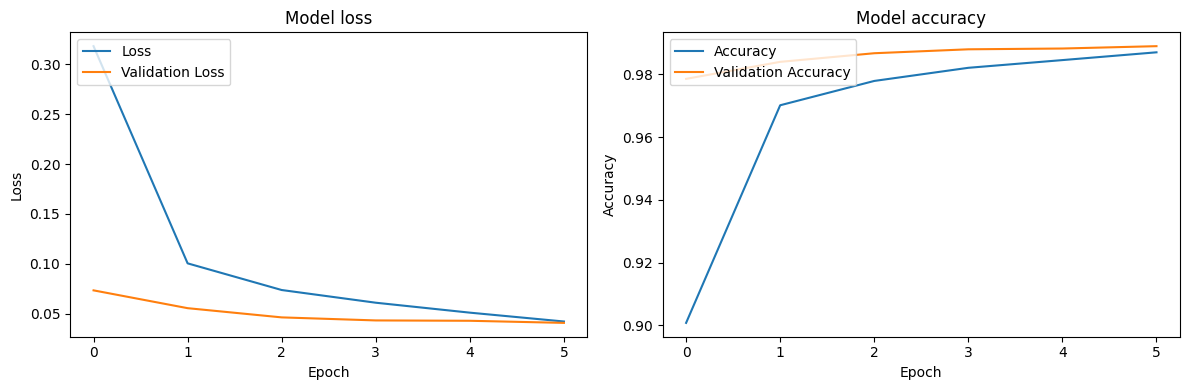

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')



# Plot training & validation accuracy values


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# # Question 8

# Let's analyze the differences between the two convolutional neural network (CNN) models:

# **a) Time taken for each training epoch**:
# - In the improved model with dropout, the time taken for the first epoch is 5 seconds, and for the subsequent epochs, it's around 3 seconds.
# - In the previous model, the time taken for the first epoch was 15 seconds, and for the subsequent epochs, it was around 3 seconds.

# **Observation**: The improved model with dropout is faster in the first epoch compared to the previous model. This could be due to various reasons, including the dropout layers (which reduce the number of active neurons during training) and potential differences in the computational environment. However, the times for subsequent epochs are comparable between the two models.

# **b) Training history for both training and validation sets**:
# - **Starting Performance**: The improved model starts with a slightly lower training accuracy (0.9008 vs. 0.9289) but achieves a similar validation accuracy (0.9786 vs. 0.9805) in the first epoch.

# - **Rate of Improvement**: Both models show rapid improvement in accuracy and reduction in loss across epochs. However, the improved model's training accuracy is slightly lower than the previous model by the 6th epoch (0.9870 vs. 0.9968). This is expected due to the regularization effect of dropout, which prevents overfitting to the training data.

# - **Validation Performance**: The validation accuracy of the improved model by the 6th epoch is 0.9890, which is very close to the previous model's 0.9897. The validation loss for the improved model is also comparable to the previous model.

# **c) Generalization of the resulting model**:
# - The improved model's validation accuracy is very close to its training accuracy, indicating good generalization. The use of dropout layers has likely contributed to this by preventing overfitting.

# - The slight difference between training and validation metrics in the improved model (compared to the previous model) suggests that the dropout technique has successfully regularized the model, making it less prone to overfitting to the training data.

# - Given that the validation accuracy is close to 99%, the improved model generalizes very well to unseen data.

# **In conclusion**:
# - The improved model with dropout layers takes less time for the first epoch but has comparable times for subsequent epochs.

# - The training history of the improved model shows slightly lower training accuracy but similar validation accuracy, indicating the regularization effect of dropout.

# - The improved model generalizes well to unseen data, as evidenced by the high validation accuracy and the close match between training and validation metrics.

In [ ]:
# Exercise 2

In [ ]:
# Import necessary libraries
import numpy as np
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical

# Download the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Prepare the test and training images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the training and test labels to categorical variables
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print shapes to verify
# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)
# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(32, 32, 3),padding='same'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu",padding='same'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
optimizer = keras.optimizers.legacy.RMSprop(learning_rate=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,
metrics='accuracy')

history = model.fit(x_train, y_train, batch_size=32,epochs=20, verbose=1, validation_split=0.2,validation_data=(x_test, y_test),shuffle=True)


  3751936/170498071 [..............................] - ETA: 3:06

KeyboardInterrupt: ignored

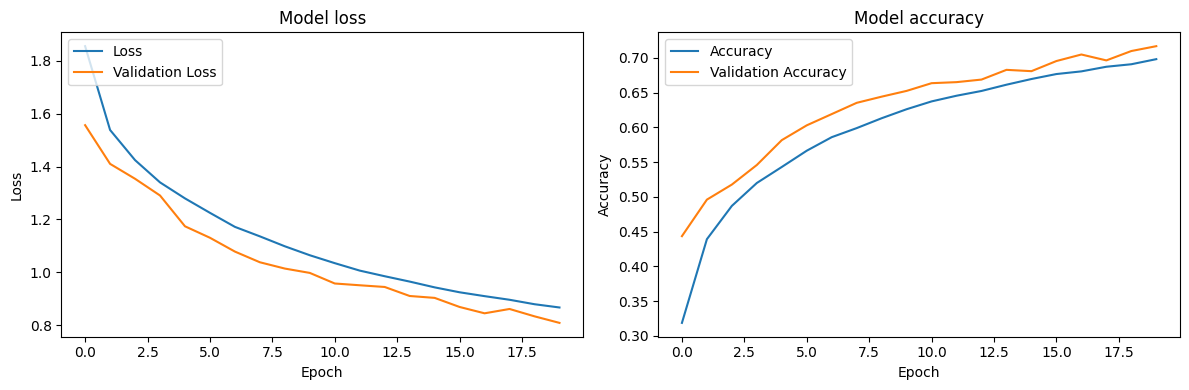

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')



# Plot training & validation accuracy values


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# # Question 9

# **a) How long does it take to run each training epoch?**
# - The time taken for each training epoch varies slightly but is approximately between 8 to 10 seconds.

# **b) Give at least two factors that may contribute to this difference, explaining each.**
# 1. **Dataset Complexity**: The CIFAR-10 dataset, which contains colored images of 10 different classes (like cars, ships, dogs, etc.), is more complex than the MNIST dataset, which only contains grayscale images of handwritten digits. Processing colored images requires more computational power and time than grayscale images.
# 2. **Model Complexity**: The updated model for CIFAR-10 has more layers and more neurons in each layer compared to the previous model for digit recognition. More layers and neurons mean more parameters to train, which can increase the training time for each epoch.

# **c) Describe in detail how the training history differs and why.**
# - **Starting Performance**: The CIFAR-10 model starts with a lower accuracy (0.3185) compared to the MNIST model. This is expected because CIFAR-10 is a more complex dataset with colored images and more diverse classes.

# - **Rate of Improvement**: The CIFAR-10 model's accuracy improves steadily across epochs but doesn't reach the high accuracies observed with the MNIST dataset within the same number of epochs. This again highlights the complexity of the CIFAR-10 dataset.

# - **Loss Values**: The loss values for the CIFAR-10 model start higher and decrease more gradually compared to the MNIST model. This suggests that the CIFAR-10 task is more challenging, and the model takes longer to optimize.

# - **Validation Performance**: The gap between training and validation metrics for the CIFAR-10 model is more pronounced, especially in the initial epochs, indicating potential overfitting. However, as epochs progress, this gap narrows, suggesting better generalization.

# **d) The simpler, non-convolutional models from Exercise 1 (Questions 2-5) would perform very poorly on this object recognition task, while they do fairly well on number recognition. What differences between these tasks could underlie this difference in performance?**
# 1. **Dataset Complexity**: As mentioned earlier, CIFAR-10 is a colored image dataset with diverse classes, making it more complex than the grayscale MNIST dataset. Simple models might not capture the intricate patterns and features required to distinguish between the CIFAR-10 classes.

# 2. **Inherent Task Difficulty**: Recognizing objects (like cars, ships, birds) is inherently more challenging than recognizing handwritten digits. Objects in CIFAR-10 can have various orientations, backgrounds, and lighting conditions, whereas digits in MNIST are centered and have a uniform background.

# In conclusion, the CIFAR-10 dataset's complexity and the inherent difficulty of the object recognition task make it more challenging than digit recognition. This is reflected in the longer training times, slower improvement rates, and overall lower accuracies when using similar model architectures.

In [ ]:



































































##EXERSICE 3






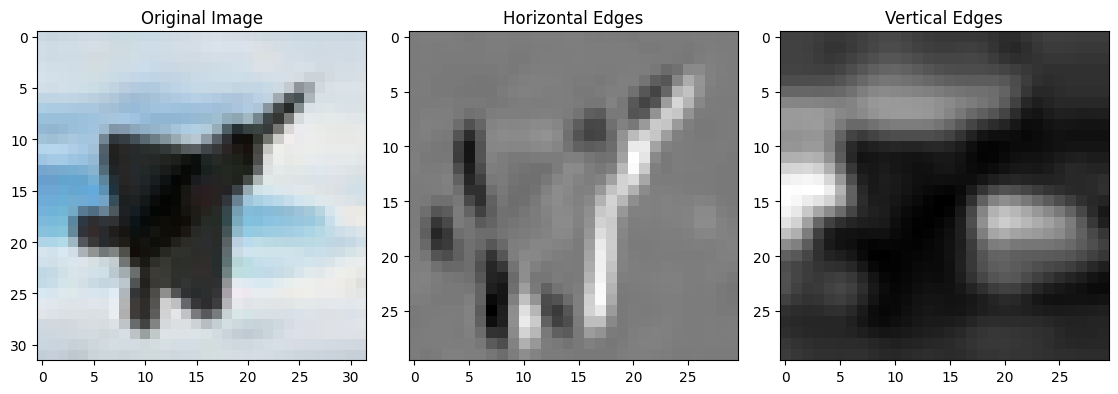

In [ ]:
# QUESTION 10
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.datasets import cifar10

# Load the CIFAR-10 dataset in the training set
(x_train, _), (_, _) = cifar10.load_data()
#(x_train, _), (_, _) = keras.datasets.mnist.load_data()

# Normalize the images of the training set
x_train = x_train.astype('float32') / 255.0

# choose a random image
random_idx = np.random.randint(x_train.shape[0])
image = x_train[random_idx]

# Define a set of filters for detecting horizontal and vertical edges for RGB images
filters = np.array([
    [[-1, -1, -1],
     [ 0,  0,  0],
     [ 1,  1,  1]],

    [[-1, 0, 1],
     [-1, 0, 1],
     [-1, 0, 1]]
])
# Convolution operation for RGB images with multiple filters
def convolveRGB(image, filters):
    output_height = image.shape[0] - filters.shape[1] + 1
    output_width = image.shape[1] - filters.shape[2] + 1
    output_depth = filters.shape[0]
    output = np.zeros((output_height, output_width, output_depth))
    for d in range(output_depth):
        for i in range(output_height):
            for j in range(output_width):
              if len(image.shape)==3:
                input_section = image[i:i+filters.shape[1], j:j+filters.shape[2],:]
              else:
                input_section = image[i:i+filters.shape[1], j:j+filters.shape[2]]

              output[i, j, d] = np.sum(input_section * filters[d])
    return output
# Apply the filters to the image
convolved_images = convolveRGB(image, filters)

# Display the original and convolved images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image')

filter_titles = ['Horizontal Edges', 'Vertical Edges']
for i in range(convolved_images.shape[2]):
    plt.subplot(1, 4, i+2)
    plt.imshow(convolved_images[:, :, i], cmap='gray')
    plt.title(filter_titles[i])

plt.tight_layout()
plt.show()


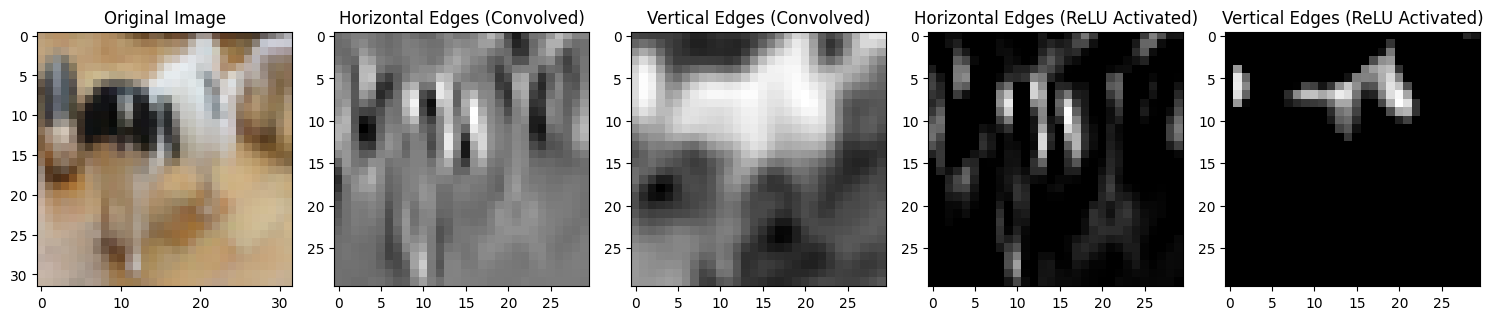

In [ ]:
# Question 11
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.datasets import cifar10
import keras

# Load the CIFAR-10 dataset
# Load the CIFAR-10 dataset in the training set
(x_train, _), (_, _) = cifar10.load_data()
#(x_train, _), (_, _) = keras.datasets.mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0

# Pick a random image
random_idx = np.random.randint(x_train.shape[0])
image = x_train[random_idx]


# ReLU activation function
def relu_activation(feature_map):
    return np.maximum(0, feature_map)

# Apply the filters and ReLU activation
convolved_images = convolveRGB(image, filters)
activated_images = relu_activation(convolved_images)

# Display the original, convolved, and activated images
plt.figure(figsize=(15, 7))

plt.subplot(1, 5, 1)
plt.imshow(image)
plt.title('Original Image')

filter_titles = ['Horizontal Edges', 'Vertical Edges']
for i in range(convolved_images.shape[2]):
    plt.subplot(1, 5, i+2)
    plt.imshow(convolved_images[:, :, i], cmap='gray')
    plt.title(filter_titles[i] + ' (Convolved)')

    plt.subplot(1, 5, i+4)
    plt.imshow(activated_images[:, :, i], cmap='gray')
    plt.title(filter_titles[i] + ' (ReLU Activated)')

plt.tight_layout()
plt.show()


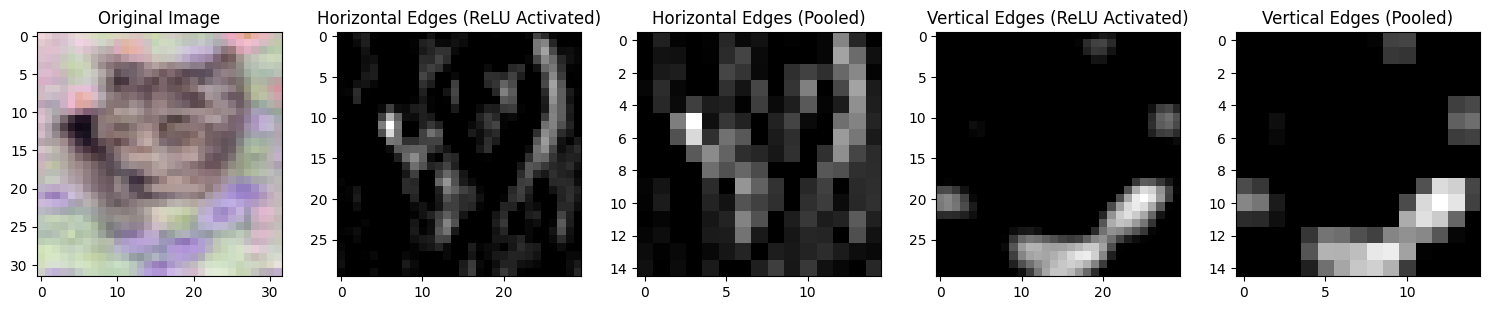

In [ ]:
# Question 12
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0

# Pick a random image
random_idx = np.random.randint(x_train.shape[0])
image = x_train[random_idx]


# ReLU activation function
def relu_activation(feature_map):
    return np.maximum(0, feature_map)

# Apply the filters and ReLU activation
convolved_images = convolveRGB(image, filters)
activated_images = relu_activation(convolved_images)

def max_pooling(feature_map, size=2, stride=2):

    # Calculate the dimensions of the output feature map
    output_height = (feature_map.shape[0] - size) // stride + 1
    output_width = (feature_map.shape[1] - size) // stride + 1
    output_depth = feature_map.shape[2]

    # Initialize the output feature map with zeros
    output = np.zeros((output_height, output_width, output_depth))

    for d in range(output_depth):
        for i in range(0, output_height * stride, stride):
            for j in range(0, output_width * stride, stride):
                output[i // stride, j // stride, d] = np.max(feature_map[i:i+size, j:j+size, d])

    return output

# Apply max pooling to the activated images
pooled_images = max_pooling(activated_images, size=2, stride=2)

# Display the original, activated, and pooled images
plt.figure(figsize=(15, 7))

plt.subplot(1, 5, 1)
plt.imshow(image)
plt.title('Original Image')

filter_titles = ['Horizontal Edges', 'Vertical Edges']
for i in range(pooled_images.shape[2]):
    plt.subplot(1, 5, 2*i+2)
    plt.imshow(activated_images[:, :, i], cmap='gray')
    plt.title(filter_titles[i] + ' (ReLU Activated)')

    plt.subplot(1, 5, 2*i+3)
    plt.imshow(pooled_images[:, :, i], cmap='gray')
    plt.title(filter_titles[i] + ' (Pooled)')

plt.tight_layout()
plt.show()



In [ ]:
# Question 13
def normalize_feature_map(feature_map):

    mean = np.mean(feature_map)
    std = np.std(feature_map)

    # Avoid division by zero
    if std == 0:
        return feature_map - mean
    else:
        return (feature_map - mean) / std

# Example usage:
normalized_feature_map = normalize_feature_map(pooled_images[:, :, 0])


In [ ]:
# Question 14

def custom_flatten(input_data):

    flat_list = []
    for sub_array in input_data:
        if isinstance(sub_array, (list, np.ndarray)):
            for item in custom_flatten(sub_array):
                flat_list.append(item)
        else:
            flat_list.append(sub_array)
    return np.array(flat_list)

def fully_connected_layer(input_data, weights, biases=None):


    flattened_input = custom_flatten(input_data)

    # Compute the output without using np.dot
    output = [sum(flattened_input * weight_column) for weight_column in weights.T]

    # Add biases if provided
    if biases is not None:
        output = [out + bias for out, bias in zip(output, biases)]

    return output

# Example usage:
# Assuming input_data is a 2D feature map of size 5x5 and we have 10 output nodes
input_data = np.random.rand(5, 5)
weights = np.random.rand(25, 10)  # 25 input nodes (after flattening) and 10 output nodes
biases = np.random.rand(10)

output = fully_connected_layer(input_data, weights, biases)


In [ ]:
# Question 15
def softmax(x):
    exp_x = [np.exp(i) for i in x]
    sum_exp_x = sum(exp_x)
    softmax_values = [i / sum_exp_x for i in exp_x]
    return softmax_values